In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_int_salary_18-19')

In [3]:
qbs.dtypes

NAME         object
INT           int64
INT_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,INT,INT_rank,salary
0,Teddy Bridgewater,1,3.0,6000000
1,Tyrod Taylor,2,6.5,15250000
2,Aaron Rodgers,2,6.5,33500000
3,Chase Daniel,2,6.5,5000000
4,Jimmy Garoppolo,3,12.0,27500000


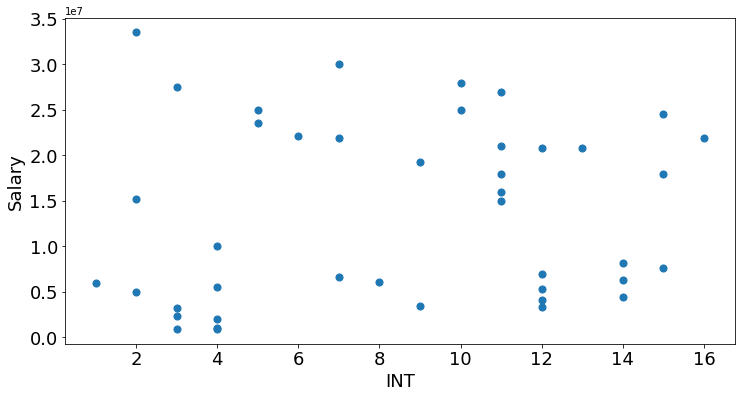

In [5]:
ax = qbs.plot(kind="scatter", x = 'INT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('INT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['INT', 'salary']])

In [7]:
X.mean(axis = 0)

array([-8.45884209e-17, -7.66582565e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.78948766,  0.77564502],
       [-1.192395  , -0.91786376],
       [-0.09082601, -0.85151165],
       [ 1.05919161, -0.81292481],
       [-0.76400706,  1.29586422]])

In [11]:
km.predict(X)

array([1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 2, 4, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,INT,INT_rank,salary,clusters
0,Teddy Bridgewater,1,3.0,6000000,1
1,Tyrod Taylor,2,6.5,15250000,1
2,Aaron Rodgers,2,6.5,33500000,4
3,Chase Daniel,2,6.5,5000000,1
4,Jimmy Garoppolo,3,12.0,27500000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.19230769e+01, 2.11743462e+07],
       [3.09090909e+00, 4.75194927e+06],
       [8.00000000e+00, 5.39538300e+06],
       [1.31250000e+01, 5.76956963e+06],
       [5.00000000e+00, 2.62190476e+07]])

In [14]:
qbs.groupby('clusters')[['INT', 'salary']].mean()

,INT,salary
clusters,,
0,11.923077,2.117435e+07
1,3.090909,4.751949e+06
2,8.000000,5.395383e+06
3,13.125000,5.769570e+06
4,5.000000,2.621905e+07


In [15]:
centroids = qbs.groupby('clusters')[['INT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

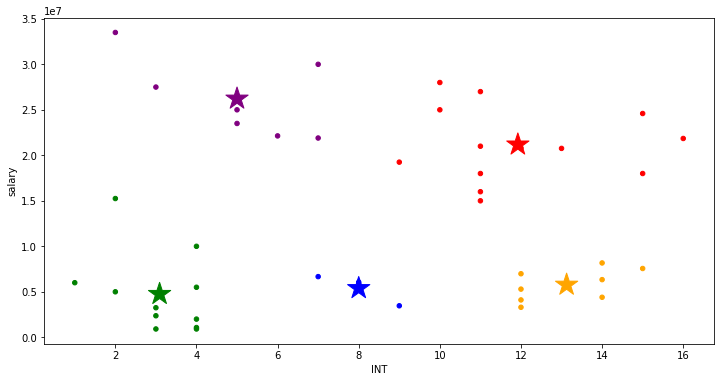

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'INT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'INT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

10.866386108758096

In [18]:
silhouette_score(X, km.labels_)

0.4990789014717052